In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mt. Auburn St. corridor 

## Read in the data and get them split into small datasets

In [2]:
r71_in = pd.read_csv('AVL_2019/Mt Auburn St/R71_in.csv')
r71_out = pd.read_csv('AVL_2019/Mt Auburn St/R71_out.csv')
r73_in = pd.read_csv('AVL_2019/Mt Auburn St/R73_in.csv')
r73_out = pd.read_csv('AVL_2019/Mt Auburn St/R73_out.csv')

In [3]:
r71_in

,tripdate,year,route,trip,stopid,actstoptime,dir,seasonal_period,implemented
0,2015-09-30,2015,71,25957177,2076,2015-09-30 20:21:58,1,1.0,0
1,2015-09-30,2015,71,25957187,2076,2015-10-01 01:00:12,1,1.0,0
2,2015-09-30,2015,71,25957186,2076,2015-10-01 01:38:37,0,1.0,0
3,2015-09-30,2015,71,25957176,2062,2015-09-30 20:52:12,0,1.0,0
4,2015-09-30,2015,71,25957176,2068,2015-09-30 20:56:22,0,1.0,0
...,...,...,...,...,...,...,...,...,...
95081,2019-11-21,2019,71,66749743,2068,2019-11-21 20:10:51,0,2.0,1
95082,2019-11-21,2019,71,66749647,2062,2019-11-21 14:06:30,0,2.0,1
95083,2019-11-21,2019,71,66749638,2066,2019-11-21 14:58:48,0,2.0,1
95084,2019-11-21,2019,71,66749614,2062,2019-11-21 14:35:59,0,2.0,1


In [4]:
r71_in_sea1 = r71_in[r71_in['seasonal_period']==1 ]
r71_in_sea2 = r71_in[r71_in['seasonal_period']==2 ]
r73_in_sea1 = r73_in[r73_in['seasonal_period']==1 ]
r73_in_sea2 = r73_in[r73_in['seasonal_period']==2 ]


In [5]:
r71_in_sea1_0 = r71_in_sea1[r71_in_sea1['implemented'] == 0]
r71_in_sea1_1 = r71_in_sea1[r71_in_sea1['implemented'] == 1]
r73_in_sea1_0 = r73_in_sea1[r73_in_sea1['implemented'] == 0]
r73_in_sea1_1 = r73_in_sea1[r73_in_sea1['implemented'] == 1]
r71_in_sea2_0 = r71_in_sea2[r71_in_sea2['implemented'] == 0]
r71_in_sea2_1 = r71_in_sea2[r71_in_sea2['implemented'] == 1]
r73_in_sea2_0 = r73_in_sea2[r73_in_sea2['implemented'] == 0]
r73_in_sea2_1 = r73_in_sea2[r73_in_sea2['implemented'] == 1]



In [27]:
# get the actstoptime in hours
r71_in_sea1_0['stoptime_hr'] = pd.to_datetime(r71_in_sea1_0['actstoptime']).dt.hour + pd.to_datetime(r71_in_sea1_0['actstoptime']).dt.minute/60 + pd.to_datetime(r71_in_sea1_0['actstoptime']).dt.second/3600
r71_in_sea1_1['stoptime_hr'] = pd.to_datetime(r71_in_sea1_1['actstoptime']).dt.hour + pd.to_datetime(r71_in_sea1_1['actstoptime']).dt.minute/60 + pd.to_datetime(r71_in_sea1_1['actstoptime']).dt.second/3600
r73_in_sea1_0['stoptime_hr'] = pd.to_datetime(r73_in_sea1_0['actstoptime']).dt.hour + pd.to_datetime(r73_in_sea1_0['actstoptime']).dt.minute/60 + pd.to_datetime(r73_in_sea1_0['actstoptime']).dt.second/3600
r73_in_sea1_1['stoptime_hr'] = pd.to_datetime(r73_in_sea1_1['actstoptime']).dt.hour + pd.to_datetime(r73_in_sea1_1['actstoptime']).dt.minute/60 + pd.to_datetime(r73_in_sea1_1['actstoptime']).dt.second/3600
r71_in_sea2_0['stoptime_hr'] = pd.to_datetime(r71_in_sea2_0['actstoptime']).dt.hour + pd.to_datetime(r71_in_sea2_0['actstoptime']).dt.minute/60 + pd.to_datetime(r71_in_sea2_0['actstoptime']).dt.second/3600
r71_in_sea2_1['stoptime_hr'] = pd.to_datetime(r71_in_sea2_1['actstoptime']).dt.hour + pd.to_datetime(r71_in_sea2_1['actstoptime']).dt.minute/60 + pd.to_datetime(r71_in_sea2_1['actstoptime']).dt.second/3600
r73_in_sea2_0['stoptime_hr'] = pd.to_datetime(r73_in_sea2_0['actstoptime']).dt.hour + pd.to_datetime(r73_in_sea2_0['actstoptime']).dt.minute/60 + pd.to_datetime(r73_in_sea2_0['actstoptime']).dt.second/3600
r73_in_sea2_1['stoptime_hr'] = pd.to_datetime(r73_in_sea2_1['actstoptime']).dt.hour + pd.to_datetime(r73_in_sea2_1['actstoptime']).dt.minute/60 + pd.to_datetime(r73_in_sea2_1['actstoptime']).dt.second/3600



/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/2569259881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r71_in_sea1_0['stoptime_hr'] = pd.to_datetime(r71_in_sea1_0['actstoptime']).dt.hour + pd.to_datetime(r71_in_sea1_0['actstoptime']).dt.minute/60 + pd.to_datetime(r71_in_sea1_0['actstoptime']).dt.second/3600
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/2569259881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r71_in_sea1_1['stoptime_hr'] = pd.to_datetime(r71_

In [7]:
# Group by 'trip' and filter groups with exactly 4 rows. Get the impacts for the full extent of the corridors provided
r71_in_sea1_0_full = r71_in_sea1_0.groupby('trip').filter(lambda x: len(x) == 4)
r71_in_sea1_1_full = r71_in_sea1_1.groupby('trip').filter(lambda x: len(x) == 4)
r73_in_sea1_0_full = r73_in_sea1_0.groupby('trip').filter(lambda x: len(x) == 4)
r73_in_sea1_1_full = r73_in_sea1_1.groupby('trip').filter(lambda x: len(x) == 4)


In [8]:
# Convert actstoptime to datetime
r71_in['actstoptime'] = pd.to_datetime(r71_in['actstoptime'])

# Filter the data for stopid 2062 and 2066
filtered_data = r71_in[r71_in['stopid'].isin([2062, 2066])]

# Sort the data by trip and actstoptime
filtered_data = filtered_data.sort_values(by=['trip', 'actstoptime'])

# Calculate the time difference in seconds for each trip
filtered_data['time_diff'] = filtered_data.groupby('trip')['actstoptime'].diff().dt.total_seconds()

# Filter the data to only include rows where stopid is 2066
result = filtered_data[filtered_data['stopid'] == 2066]

print(result[['trip', 'stopid', 'actstoptime', 'time_diff']])

           trip  stopid         actstoptime  time_diff
33     25954228    2066 2015-09-30 08:36:11     1196.0
46     25954270    2066 2015-09-30 15:48:19        NaN
42     25954272    2066 2015-09-30 14:50:55        NaN
150    25954279    2066 2015-09-30 12:56:18      178.0
146    25954281    2066 2015-09-30 11:45:46      237.0
...         ...     ...                 ...        ...
95007  66749695    2066 2019-11-21 17:30:37        NaN
95028  66749701    2066 2019-11-21 08:03:26      347.0
95071  66749725    2066 2019-11-21 07:57:04      344.0
95052  66749758    2066 2019-11-21 07:25:48      255.0
95022  66749800    2066 2019-11-21 12:24:47      148.0

[5084 rows x 4 columns]


In [28]:
def calculate_travel_time(data, stopid_1, stopid_2):
    # Convert actstoptime to datetime
    data['actstoptime'] = pd.to_datetime(data['actstoptime'])

    # Filter the data for the specified stop IDs
    filtered_data = data[data['stopid'].isin([stopid_1, stopid_2])]

    # Sort the data by trip and actstoptime
    filtered_data = filtered_data.sort_values(by=['trip', 'actstoptime'])

    # Calculate the time difference in seconds for each trip
    filtered_data['time_diff'] = filtered_data.groupby('trip')['actstoptime'].diff().dt.total_seconds()

    # Filter the data to only include rows where stopid matches stopid_2
    result = filtered_data[filtered_data['stopid'] == stopid_2]

    # Create a new DataFrame "travel_time" with the required columns
    travel_time = result[['trip', 'stopid', 'actstoptime', 'time_diff']].copy()
    travel_time.rename(columns={'stopid': 'stopid_2'}, inplace=True)
    travel_time['stopid_1'] = stopid_1

    return travel_time

# Create an empty DataFrame to store all results
r71_in_sea1_0_tt = pd.DataFrame()
r71_in_sea1_1_tt = pd.DataFrame()
r71_in_sea2_0_tt = pd.DataFrame()
r71_in_sea2_1_tt = pd.DataFrame()
r73_in_sea1_0_tt = pd.DataFrame()
r73_in_sea1_1_tt = pd.DataFrame()
r73_in_sea2_0_tt = pd.DataFrame()
r73_in_sea2_1_tt = pd.DataFrame()



# Example calls with different stop IDs
stop_pairs = [(2062, 2066), (2066, 2068), (2068, 2076)]

for stopid_1, stopid_2 in stop_pairs:
    result1 = calculate_travel_time(r71_in_sea1_0, stopid_1, stopid_2)
    result2 = calculate_travel_time(r71_in_sea1_1, stopid_1, stopid_2)
    result3 = calculate_travel_time(r71_in_sea2_0, stopid_1, stopid_2)
    result4 = calculate_travel_time(r71_in_sea2_1, stopid_1, stopid_2)
    r71_in_sea1_0_tt = pd.concat([r71_in_sea1_0_tt, result1], ignore_index=True)
    r71_in_sea1_1_tt = pd.concat([r71_in_sea1_1_tt, result2], ignore_index=True)
    r71_in_sea2_0_tt = pd.concat([r71_in_sea2_0_tt, result3], ignore_index=True)
    r71_in_sea2_1_tt = pd.concat([r71_in_sea2_1_tt, result4], ignore_index=True)

stop_pairs = [(2117, 2066), (2066, 2068), (2068, 2076)]
for stopid_1, stopid_2 in stop_pairs:
    result1 = calculate_travel_time(r73_in_sea1_0, stopid_1, stopid_2)
    result2 = calculate_travel_time(r73_in_sea1_1, stopid_1, stopid_2)
    result3 = calculate_travel_time(r73_in_sea2_0, stopid_1, stopid_2)
    result4 = calculate_travel_time(r73_in_sea2_1, stopid_1, stopid_2)
    r73_in_sea1_0_tt = pd.concat([r73_in_sea1_0_tt, result1], ignore_index=True)
    r73_in_sea1_1_tt = pd.concat([r73_in_sea1_1_tt, result2], ignore_index=True)
    r73_in_sea2_0_tt = pd.concat([r73_in_sea2_0_tt, result3], ignore_index=True)
    r73_in_sea2_1_tt = pd.concat([r73_in_sea2_1_tt, result4], ignore_index=True)


/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [29]:
r71_in_sea1_0_tt = r71_in_sea1_0_tt.dropna()
r71_in_sea1_1_tt = r71_in_sea1_1_tt.dropna()
r71_in_sea2_0_tt = r71_in_sea2_0_tt.dropna()
r71_in_sea2_1_tt = r71_in_sea2_1_tt.dropna()
r73_in_sea1_0_tt = r73_in_sea1_0_tt.dropna()
r73_in_sea1_1_tt = r73_in_sea1_1_tt.dropna()
r73_in_sea2_0_tt = r73_in_sea2_0_tt.dropna()
r73_in_sea2_1_tt = r73_in_sea2_1_tt.dropna()

# r71_in_sea2_0_tt.dropna()
# r71_in_sea2_1_tt.dropna()

In [35]:
# get rid of the time_diff if it's greater than 1500 (outlier)
r71_in_sea1_0_tt = r71_in_sea1_0_tt[r71_in_sea1_0_tt['time_diff'] < 1000]
r71_in_sea1_1_tt = r71_in_sea1_1_tt[r71_in_sea1_1_tt['time_diff'] < 1000]
r71_in_sea2_0_tt = r71_in_sea2_0_tt[r71_in_sea2_0_tt['time_diff'] < 1000]
r71_in_sea2_1_tt = r71_in_sea2_1_tt[r71_in_sea2_1_tt['time_diff'] < 1000]
r73_in_sea1_0_tt = r73_in_sea1_0_tt[r73_in_sea1_0_tt['time_diff'] < 1000]
r73_in_sea1_1_tt = r73_in_sea1_1_tt[r73_in_sea1_1_tt['time_diff'] < 1000]
r73_in_sea2_0_tt = r73_in_sea2_0_tt[r73_in_sea2_0_tt['time_diff'] < 1000]
r73_in_sea2_1_tt = r73_in_sea2_1_tt[r73_in_sea2_1_tt['time_diff'] < 1000]


## In Bound: We first take a look at the data in season 1 (September 1 to October 7 of any year)

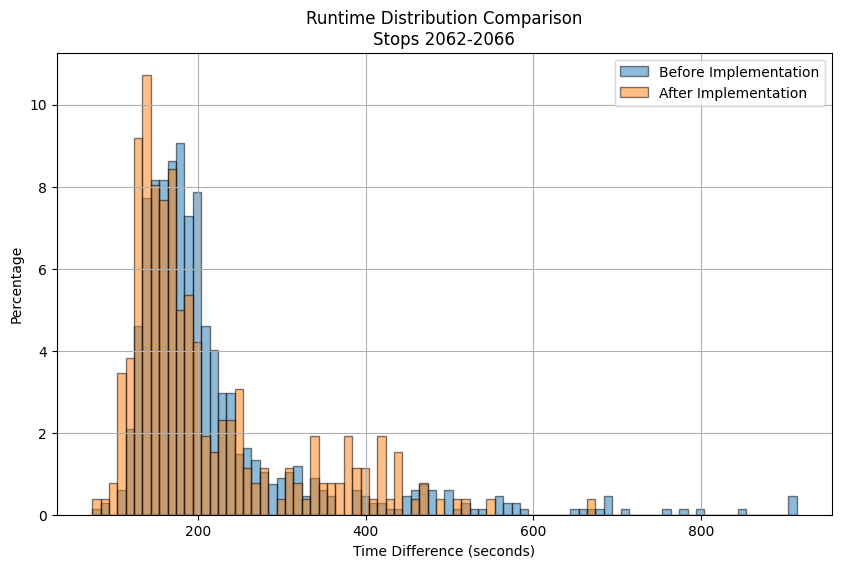

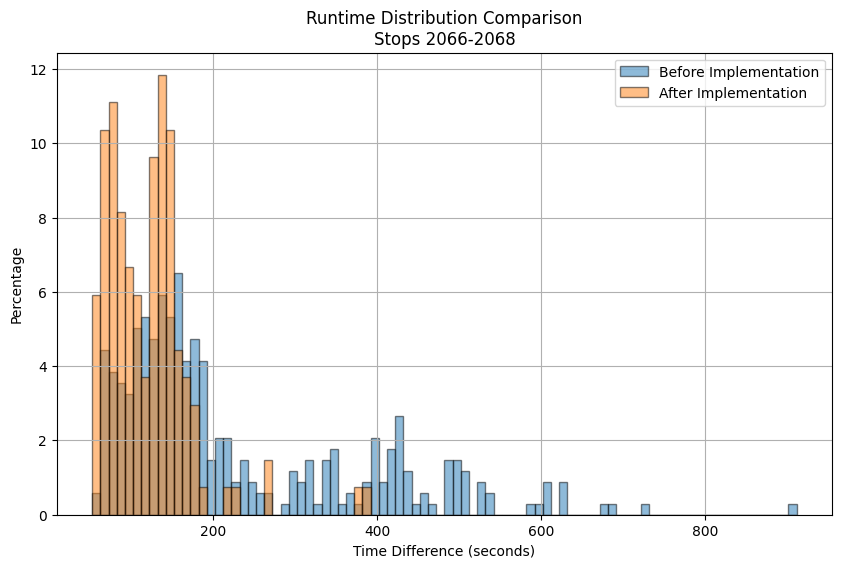

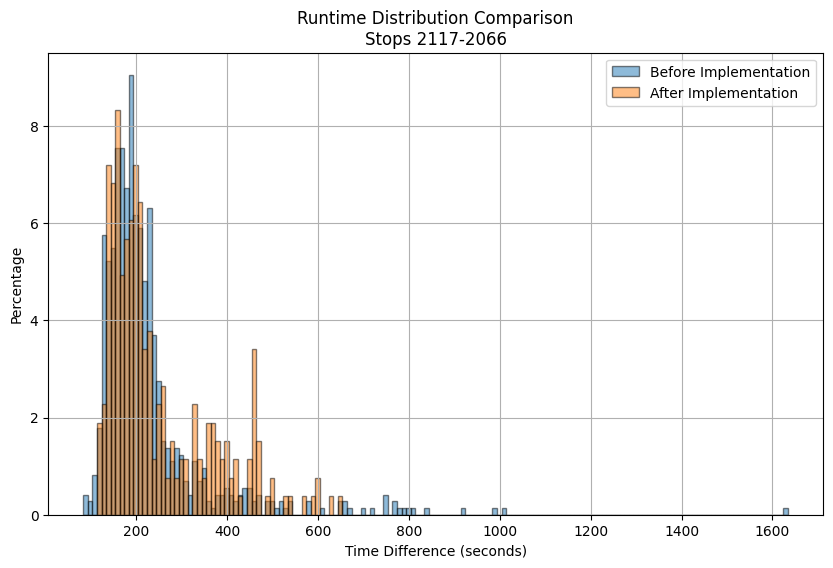

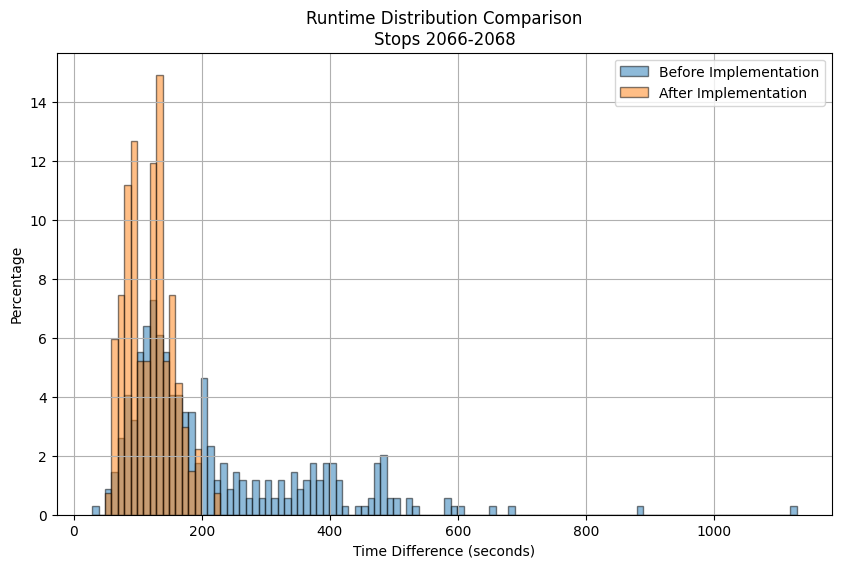

In [33]:
def plot_runtime_distribution(data1, stopid_1a, stopid_2a, label1, 
                              data2, stopid_1b, stopid_2b, label2):
    # Filter the first dataset for the specified stop IDs
    filtered_data1 = data1[(data1['stopid_1'] == stopid_1a) & (data1['stopid_2'] == stopid_2a)]
    filtered_data1 = filtered_data1.dropna(subset=['time_diff'])
    
    # Filter the second dataset for the specified stop IDs
    filtered_data2 = data2[(data2['stopid_1'] == stopid_1b) & (data2['stopid_2'] == stopid_2b)]
    filtered_data2 = filtered_data2.dropna(subset=['time_diff'])
    
    # Determine the combined min and max for both datasets to calculate a common bin width
    min_time = min(filtered_data1['time_diff'].min(), filtered_data2['time_diff'].min())
    max_time = max(filtered_data1['time_diff'].max(), filtered_data2['time_diff'].max())
    
    # Define a common bin width (e.g., 10 seconds)
    bin_width = 10
    bins = np.arange(min_time, max_time + bin_width, bin_width)
    
    # Calculate the total number of points in each dataset
    total_points1 = len(filtered_data1)
    total_points2 = len(filtered_data2)
    
    # Plot the histograms with percentages
    plt.figure(figsize=(10, 6))
    plt.hist(
        filtered_data1['time_diff'], bins=bins, edgecolor='black', alpha=0.5,
        weights=[100 / total_points1] * total_points1, label=label1
    )
    plt.hist(
        filtered_data2['time_diff'], bins=bins, edgecolor='black', alpha=0.5,
        weights=[100 / total_points2] * total_points2, label=label2
    )

    # Add titles and labels
    plt.title(f'Runtime Distribution Comparison\nStops {stopid_1a}-{stopid_2a}')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_runtime_distribution(
    r71_in_sea1_0_tt, 2062, 2066, 'Before Implementation',
    r71_in_sea1_1_tt, 2062, 2066, 'After Implementation'
)
plot_runtime_distribution(
    r71_in_sea1_0_tt, 2066, 2068, 'Before Implementation',
    r71_in_sea1_1_tt, 2066, 2068, 'After Implementation'
)
plot_runtime_distribution(
    r73_in_sea1_0_tt, 2117, 2066, 'Before Implementation',
    r73_in_sea1_1_tt, 2117, 2066, 'After Implementation'
)
plot_runtime_distribution(
    r73_in_sea1_0_tt, 2066, 2068, 'Before Implementation',
    r73_in_sea1_1_tt, 2066, 2068, 'After Implementation'
)

If we visualize the runtim through the whole day together, we can find that the bus travel time distribution are left-screw after bus lane implementation, indicating that the bus priority lane can improve bus speed and reduce travel time variability. 

The reduced travel time variability will indicate the enhancement in reliability.

In [15]:
# filter out the data in r71_in_sea1_0 AM peak (7:30-9:30 am), Midday (Noon-2:00 pm), and PM peak (4:30-6:30 pm) time periods within each day
r71_in_sea1_0_am = r71_in_sea1_0[(r71_in_sea1_0['stoptime_hr'] >= 7.5) & (r71_in_sea1_0['stoptime_hr'] <= 9.5)]
r71_in_sea1_0_mid = r71_in_sea1_0[(r71_in_sea1_0['stoptime_hr'] >= 12) & (r71_in_sea1_0['stoptime_hr'] <= 14)]
r71_in_sea1_0_pm = r71_in_sea1_0[(r71_in_sea1_0['stoptime_hr'] >= 16.5) & (r71_in_sea1_0['stoptime_hr'] <= 18.5)]

r71_in_sea1_1_am = r71_in_sea1_1[(r71_in_sea1_1['stoptime_hr'] >= 7.5) & (r71_in_sea1_1['stoptime_hr'] <= 9.5)]
r71_in_sea1_1_mid = r71_in_sea1_1[(r71_in_sea1_1['stoptime_hr'] >= 12) & (r71_in_sea1_1['stoptime_hr'] <= 14)]
r71_in_sea1_1_pm = r71_in_sea1_1[(r71_in_sea1_1['stoptime_hr'] >= 16.5) & (r71_in_sea1_1['stoptime_hr'] <= 18.5)]

r73_in_sea1_0_am = r73_in_sea1_0[(r73_in_sea1_0['stoptime_hr'] >= 7.5) & (r73_in_sea1_0['stoptime_hr'] <= 9.5)]
r73_in_sea1_0_mid = r73_in_sea1_0[(r73_in_sea1_0['stoptime_hr'] >= 12) & (r73_in_sea1_0['stoptime_hr'] <= 14)]
r73_in_sea1_0_pm = r73_in_sea1_0[(r73_in_sea1_0['stoptime_hr'] >= 16.5) & (r73_in_sea1_0['stoptime_hr'] <= 18.5)]

r73_in_sea1_1_am = r73_in_sea1_1[(r73_in_sea1_1['stoptime_hr'] >= 7.5) & (r73_in_sea1_1['stoptime_hr'] <= 9.5)]
r73_in_sea1_1_mid = r73_in_sea1_1[(r73_in_sea1_1['stoptime_hr'] >= 12) & (r73_in_sea1_1['stoptime_hr'] <= 14)]
r73_in_sea1_1_pm = r73_in_sea1_1[(r73_in_sea1_1['stoptime_hr'] >= 16.5) & (r73_in_sea1_1['stoptime_hr'] <= 18.5)]

In [41]:
# Create an empty DataFrame to store all results
r71_in_sea1_0_am_tt = pd.DataFrame()
r71_in_sea1_1_am_tt = pd.DataFrame()
r71_in_sea1_0_mid_tt = pd.DataFrame()
r71_in_sea1_1_mid_tt = pd.DataFrame()
r71_in_sea1_0_pm_tt = pd.DataFrame()
r71_in_sea1_1_pm_tt = pd.DataFrame()
r73_in_sea1_0_am_tt = pd.DataFrame()
r73_in_sea1_1_am_tt = pd.DataFrame()
r73_in_sea1_0_mid_tt = pd.DataFrame()
r73_in_sea1_1_mid_tt = pd.DataFrame()
r73_in_sea1_0_pm_tt = pd.DataFrame()
r73_in_sea1_1_pm_tt = pd.DataFrame()



# Example calls with different stop IDs
stop_pairs = [(2062, 2066), (2066, 2068), (2068, 2076), (2117, 2066)]

for stopid_1, stopid_2 in stop_pairs:
    result1 = calculate_travel_time(r71_in_sea1_0_am, stopid_1, stopid_2)
    result2 = calculate_travel_time(r71_in_sea1_1_am, stopid_1, stopid_2)
    result3 = calculate_travel_time(r71_in_sea1_0_mid, stopid_1, stopid_2)
    result4 = calculate_travel_time(r71_in_sea1_1_mid, stopid_1, stopid_2)
    result5 = calculate_travel_time(r71_in_sea1_0_pm, stopid_1, stopid_2)
    result6 = calculate_travel_time(r71_in_sea1_1_pm, stopid_1, stopid_2)
    result7 = calculate_travel_time(r73_in_sea1_0_am, stopid_1, stopid_2)
    result8 = calculate_travel_time(r73_in_sea1_1_am, stopid_1, stopid_2)
    result9 = calculate_travel_time(r73_in_sea1_0_mid, stopid_1, stopid_2)
    result10 = calculate_travel_time(r73_in_sea1_1_mid, stopid_1, stopid_2)
    result11 = calculate_travel_time(r73_in_sea1_0_pm, stopid_1, stopid_2)
    result12 = calculate_travel_time(r73_in_sea1_1_pm, stopid_1, stopid_2)

    r71_in_sea1_0_am_tt = pd.concat([r71_in_sea1_0_am_tt, result1], ignore_index=True)
    r71_in_sea1_1_am_tt = pd.concat([r71_in_sea1_1_am_tt, result2], ignore_index=True)
    r71_in_sea1_0_mid_tt = pd.concat([r71_in_sea1_0_mid_tt, result3], ignore_index=True)
    r71_in_sea1_1_mid_tt = pd.concat([r71_in_sea1_1_mid_tt, result4], ignore_index=True)
    r71_in_sea1_0_pm_tt = pd.concat([r71_in_sea1_0_pm_tt, result5], ignore_index=True)
    r71_in_sea1_1_pm_tt = pd.concat([r71_in_sea1_1_pm_tt, result6], ignore_index=True)
    r73_in_sea1_0_am_tt = pd.concat([r73_in_sea1_0_am_tt, result7], ignore_index=True)
    r73_in_sea1_1_am_tt = pd.concat([r73_in_sea1_1_am_tt, result8], ignore_index=True)
    r73_in_sea1_0_mid_tt = pd.concat([r73_in_sea1_0_mid_tt, result9], ignore_index=True)
    r73_in_sea1_1_mid_tt = pd.concat([r73_in_sea1_1_mid_tt, result10], ignore_index=True)
    r73_in_sea1_0_pm_tt = pd.concat([r73_in_sea1_0_pm_tt, result11], ignore_index=True)
    r73_in_sea1_1_pm_tt = pd.concat([r73_in_sea1_1_pm_tt, result12], ignore_index=True)


/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [25]:
print("Median Travel Time for bus 71 at AM peak before implementation", r71_in_sea1_0_am_tt["time_diff"].median())
print("Median Travel Time for bus 71 at AM peak after implementation", r71_in_sea1_1_am_tt["time_diff"].median())
print("Percentage of improvement in the AM peak:", (r71_in_sea1_0_am_tt["time_diff"].median() - r71_in_sea1_1_am_tt["time_diff"].median())/r71_in_sea1_0_am_tt["time_diff"].median())

print("Median Travel Time for bus 71 at Midday before implementation", r71_in_sea1_0_mid_tt["time_diff"].median())
print("Median Travel Time for bus 71 at Midday after implementation", r71_in_sea1_1_mid_tt["time_diff"].median())
print("Percentage of improvement in the Midday:", (r71_in_sea1_0_mid_tt["time_diff"].median() - r71_in_sea1_1_mid_tt["time_diff"].median())/r71_in_sea1_0_mid_tt["time_diff"].median())


print("Median Travel Time for bus 71 at PM peak before implementation", r71_in_sea1_0_pm_tt["time_diff"].median())
print("Median Travel Time for bus 71 at PM peak after implementation", r71_in_sea1_1_pm_tt["time_diff"].median())
print("Percentage of improvement in the PM peak:", (r71_in_sea1_0_pm_tt["time_diff"].median() - r71_in_sea1_1_pm_tt["time_diff"].median())/r71_in_sea1_0_pm_tt["time_diff"].median())

Median Travel Time for bus 71 at AM peak before implementation 343.0
Median Travel Time for bus 71 at AM peak after implementation 243.0
Percentage of improvement in the AM peak: 0.2915451895043732
Median Travel Time for bus 71 at Midday before implementation 283.0
Median Travel Time for bus 71 at Midday after implementation 148.0
Percentage of improvement in the Midday: 0.47703180212014135
Median Travel Time for bus 71 at PM peak before implementation 303.0
Median Travel Time for bus 71 at PM peak after implementation 138.0
Percentage of improvement in the PM peak: 0.5445544554455446


If we look at the whole trip in the bus priority lane in route 71,  the evening peak is most significant, reducing the travel time by 54%. The reduction of AM peak and midday are also a lot.

In [26]:
print("Median Travel Time for bus 73 at AM peak before implementation", r73_in_sea1_0_am_tt["time_diff"].median())
print("Median Travel Time for bus 73 at AM peak after implementation", r73_in_sea1_1_am_tt["time_diff"].median())
print("Percentage of improvement in the AM peak:", (r73_in_sea1_0_am_tt["time_diff"].median() - r73_in_sea1_1_am_tt["time_diff"].median())/r73_in_sea1_0_am_tt["time_diff"].median())

print("Median Travel Time for bus 73 at Midday before implementation", r73_in_sea1_0_mid_tt["time_diff"].median())
print("Median Travel Time for bus 73 at Midday after implementation", r73_in_sea1_1_mid_tt["time_diff"].median())
print("Percentage of improvement in the Midday:", (r73_in_sea1_0_mid_tt["time_diff"].median() - r73_in_sea1_1_mid_tt["time_diff"].median())/r73_in_sea1_0_mid_tt["time_diff"].median())

print("Median Travel Time for bus 73 at PM peak before implementation", r73_in_sea1_0_pm_tt["time_diff"].median())
print("Median Travel Time for bus 73 at PM peak after implementation", r73_in_sea1_1_pm_tt["time_diff"].median())
print("Percentage of improvement in the PM peak:", (r73_in_sea1_0_pm_tt["time_diff"].median() - r73_in_sea1_1_pm_tt["time_diff"].median())/r73_in_sea1_0_pm_tt["time_diff"].median())

Median Travel Time for bus 73 at AM peak before implementation 347.0
Median Travel Time for bus 73 at AM peak after implementation 128.0
Percentage of improvement in the AM peak: 0.6311239193083573
Median Travel Time for bus 73 at Midday before implementation 289.0
Median Travel Time for bus 73 at Midday after implementation 99.5
Percentage of improvement in the Midday: 0.6557093425605537
Median Travel Time for bus 73 at PM peak before implementation 298.0
Median Travel Time for bus 73 at PM peak after implementation 130.0
Percentage of improvement in the PM peak: 0.5637583892617449


The bus travel time reduction after the implementation of bus priority lanes is more significant to bus 73, with around 55%-65% travel time reduction.

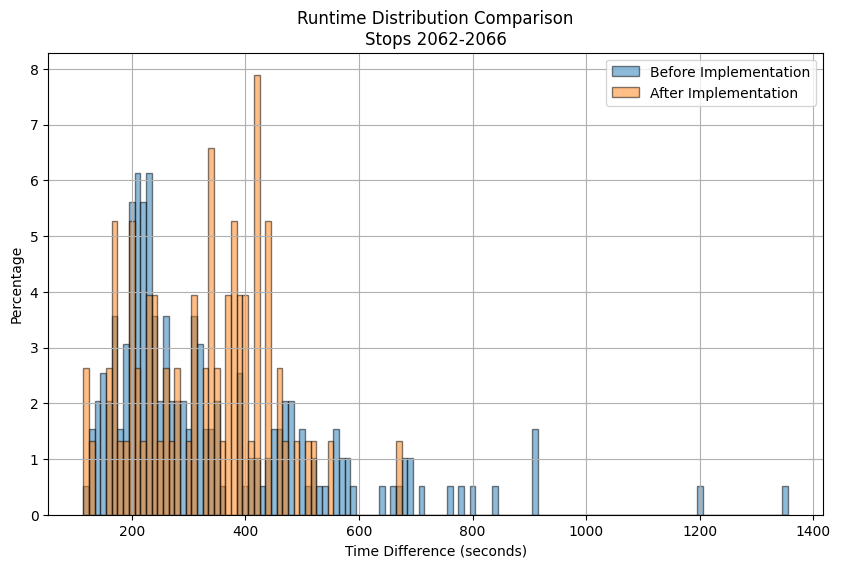

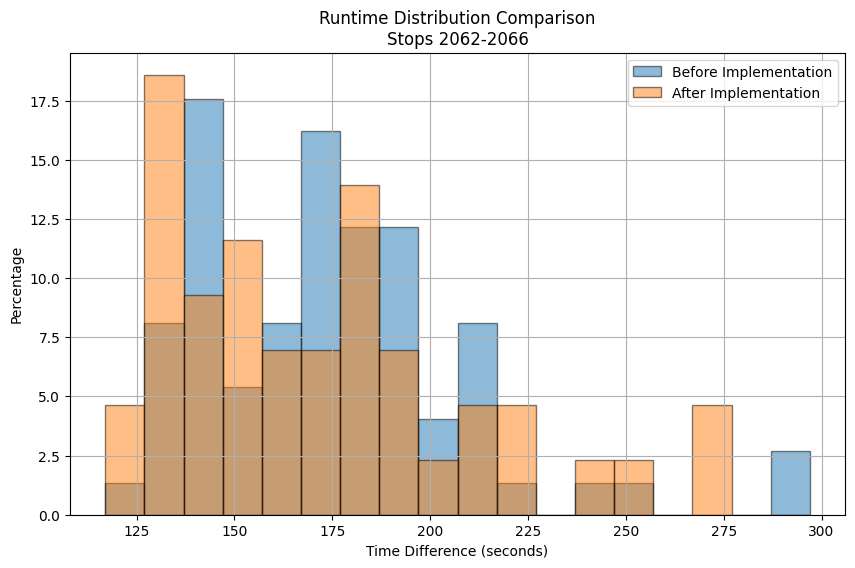

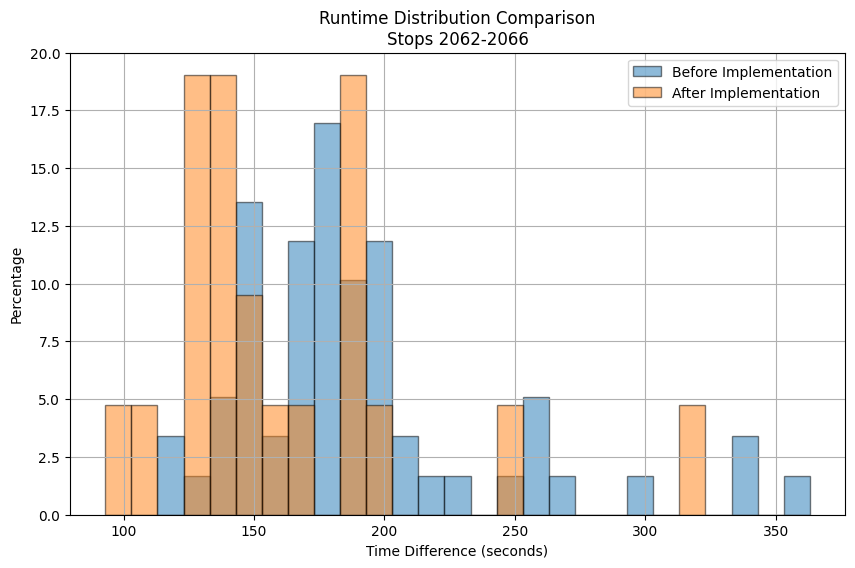

Median Travel Time for bus 71 at AM peak before implementation 343.0
Median Travel Time for bus 71 at AM peak after implementation 243.0
Percentage of improvement in the AM peak: 0.2915451895043732
Median Travel Time for bus 71 at Midday before implementation 283.0
Median Travel Time for bus 71 at Midday after implementation 148.0
Percentage of improvement in the Midday: 0.47703180212014135
Median Travel Time for bus 71 at PM peak before implementation 303.0
Median Travel Time for bus 71 at PM peak after implementation 138.0
Percentage of improvement in the PM peak: 0.5445544554455446


In [24]:
plot_runtime_distribution(
    r71_in_sea1_0_am_tt, 2062, 2066, 'Before Implementation',
    r71_in_sea1_1_am_tt, 2062, 2066, 'After Implementation'
)
plot_runtime_distribution(
    r71_in_sea1_0_mid_tt, 2062, 2066, 'Before Implementation',
    r71_in_sea1_1_mid_tt, 2062, 2066, 'After Implementation'
)
plot_runtime_distribution(
    r71_in_sea1_0_pm_tt, 2062, 2066, 'Before Implementation',
    r71_in_sea1_1_pm_tt, 2062, 2066, 'After Implementation'
)


For stop 2062-2066 in the inbound direction of route 71. The morning peak of travel time is significantly reduced and the variance is reduced as well, indicating higher speed and reliability, so as the mid day and the evening peak.

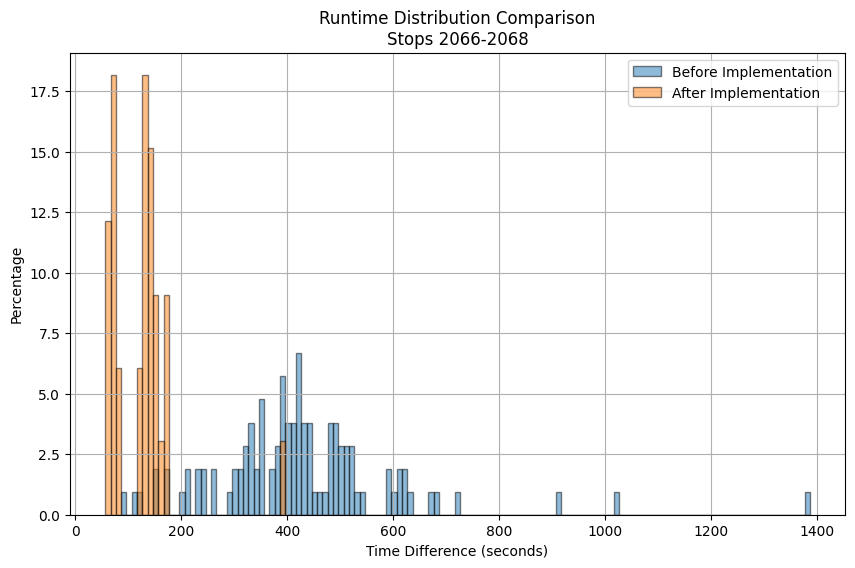

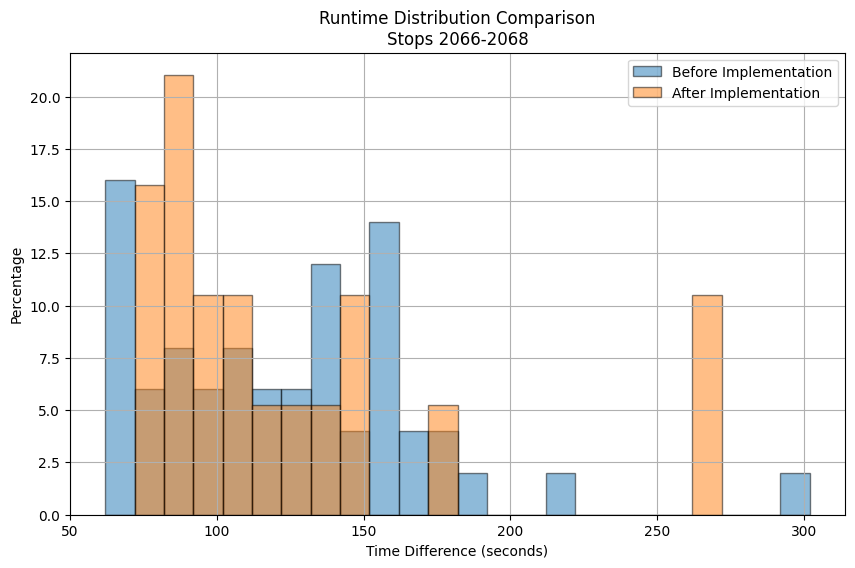

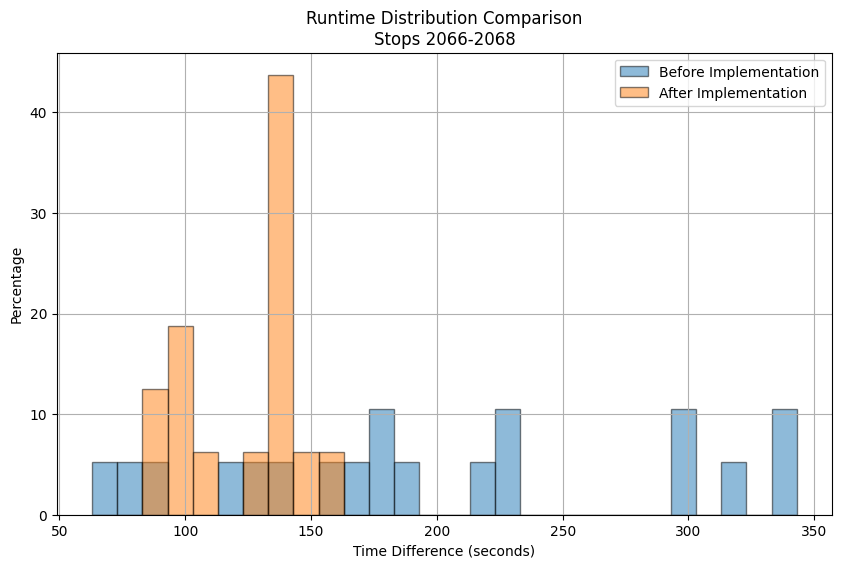

In [20]:
plot_runtime_distribution(
    r71_in_sea1_0_am_tt, 2066, 2068, 'Before Implementation',
    r71_in_sea1_1_am_tt, 2066, 2068, 'After Implementation'
)
plot_runtime_distribution(
    r71_in_sea1_0_mid_tt, 2066, 2068, 'Before Implementation',
    r71_in_sea1_1_mid_tt, 2066, 2068, 'After Implementation'
)
plot_runtime_distribution(
    r71_in_sea1_0_pm_tt, 2066, 2068, 'Before Implementation',
    r71_in_sea1_1_pm_tt, 2066, 2068, 'After Implementation'
)
print("Median Travel Time for bus 71 at AM peak before implementation", r71_in_sea1_0_am_tt["time_diff"].median())
print("Median Travel Time for bus 71 at AM peak after implementation", r71_in_sea1_1_am_tt["time_diff"].median())
print("Percentage of improvement in the AM peak:", (r71_in_sea1_0_am_tt["time_diff"].median() - r71_in_sea1_1_am_tt["time_diff"].median())/r71_in_sea1_0_am_tt["time_diff"].median())

print("Median Travel Time for bus 71 at Midday before implementation", r71_in_sea1_0_mid_tt["time_diff"].median())
print("Median Travel Time for bus 71 at Midday after implementation", r71_in_sea1_1_mid_tt["time_diff"].median())
print("Percentage of improvement in the Midday:", (r71_in_sea1_0_mid_tt["time_diff"].median() - r71_in_sea1_1_mid_tt["time_diff"].median())/r71_in_sea1_0_mid_tt["time_diff"].median())


print("Median Travel Time for bus 71 at PM peak before implementation", r71_in_sea1_0_pm_tt["time_diff"].median())
print("Median Travel Time for bus 71 at PM peak after implementation", r71_in_sea1_1_pm_tt["time_diff"].median())
print("Percentage of improvement in the PM peak:", (r71_in_sea1_0_pm_tt["time_diff"].median() - r71_in_sea1_1_pm_tt["time_diff"].median())/r71_in_sea1_0_pm_tt["time_diff"].median())

For stop 2066-2068 in the inbound direction of route 71. The morning peak of travel time is significantly reduced and the variance is reduced as well, indicating higher speed and reliability, so as the mid day and evening peak. But the travel time reduction in the morning peak is most significant.

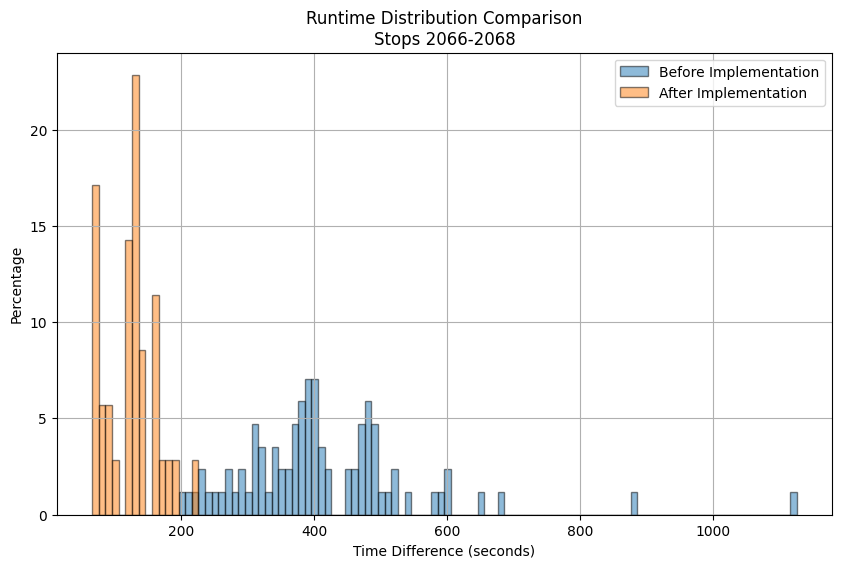

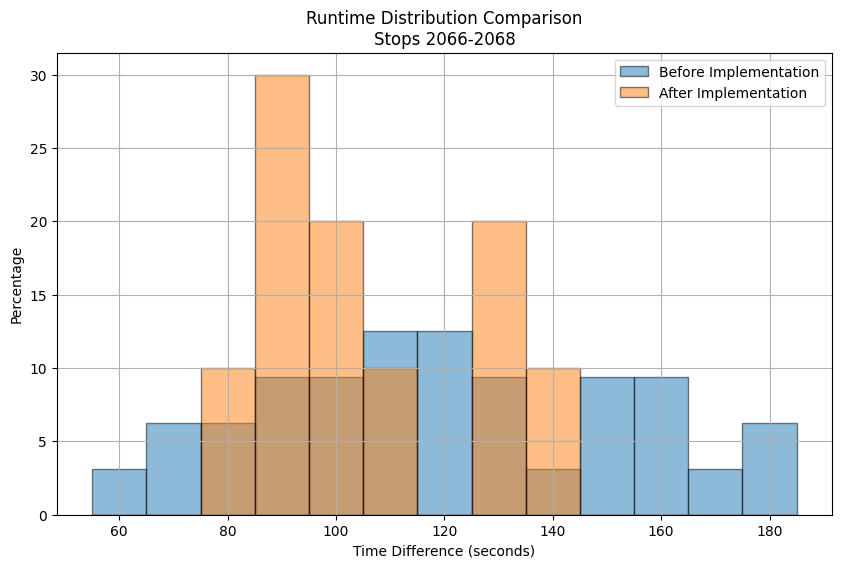

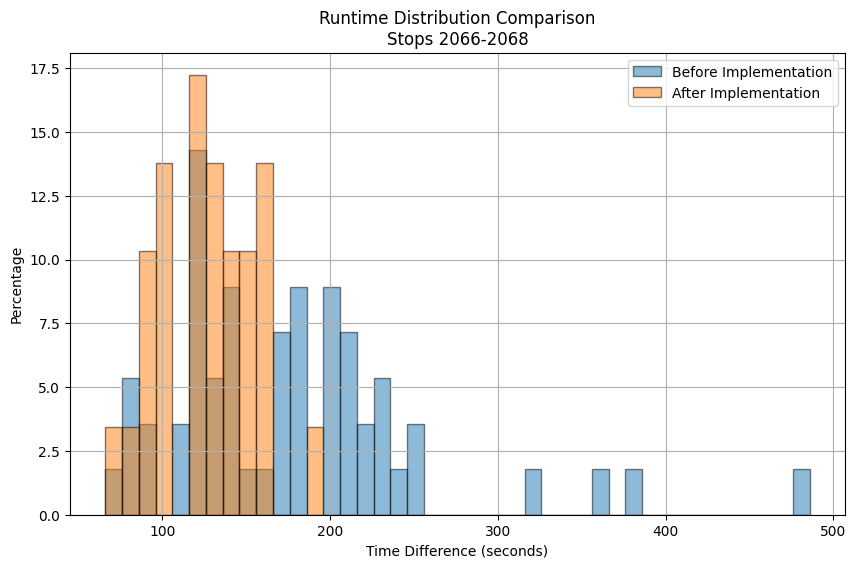

In [21]:
plot_runtime_distribution(
    r73_in_sea1_0_am_tt, 2066, 2068, 'Before Implementation',
    r73_in_sea1_1_am_tt, 2066, 2068, 'After Implementation'
)
plot_runtime_distribution(
    r73_in_sea1_0_mid_tt, 2066, 2068, 'Before Implementation',
    r73_in_sea1_1_mid_tt, 2066, 2068, 'After Implementation'
)
plot_runtime_distribution(
    r73_in_sea1_0_pm_tt, 2066, 2068, 'Before Implementation',
    r73_in_sea1_1_pm_tt, 2066, 2068, 'After Implementation'
)

## In Bound: Then we do similar processing in season 2 (November 15 to December 21 of any year)

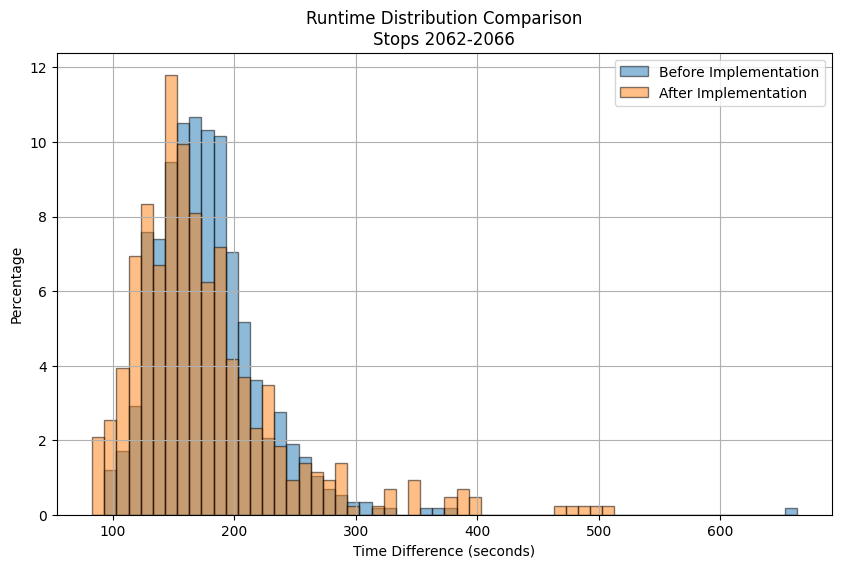

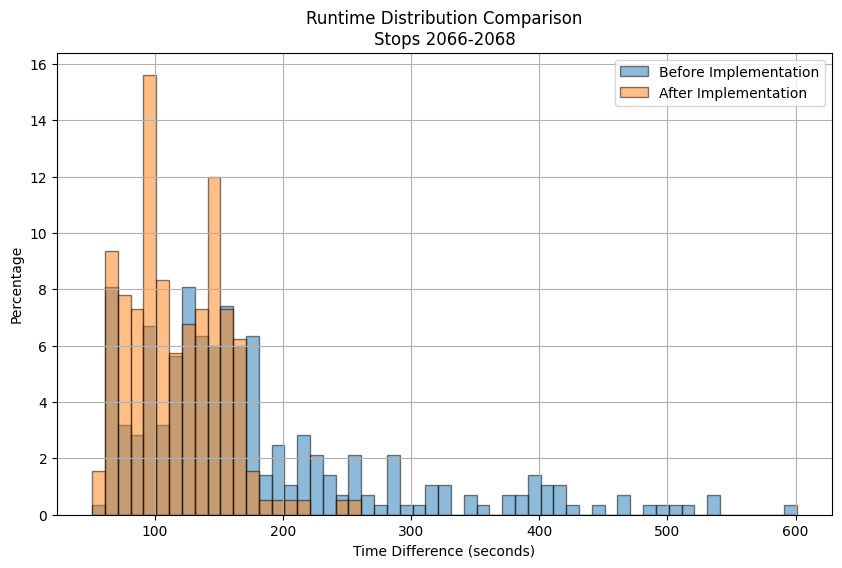

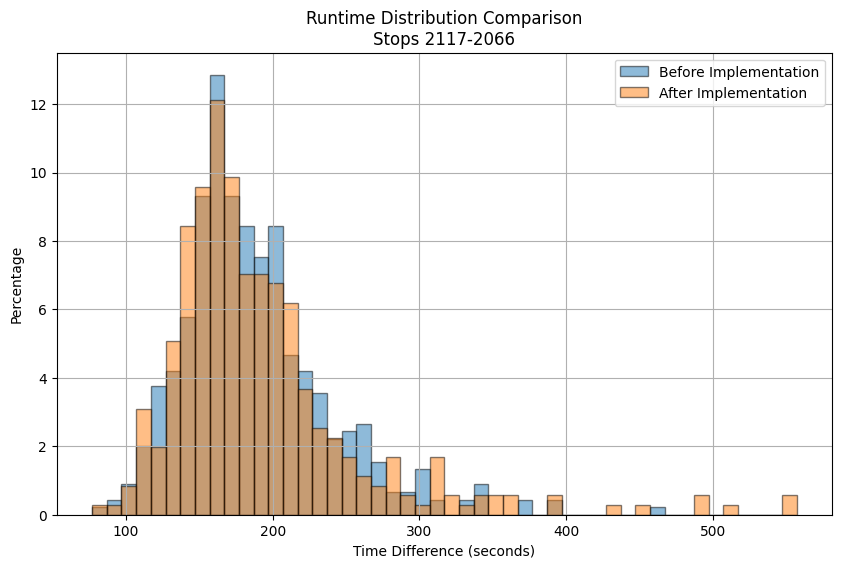

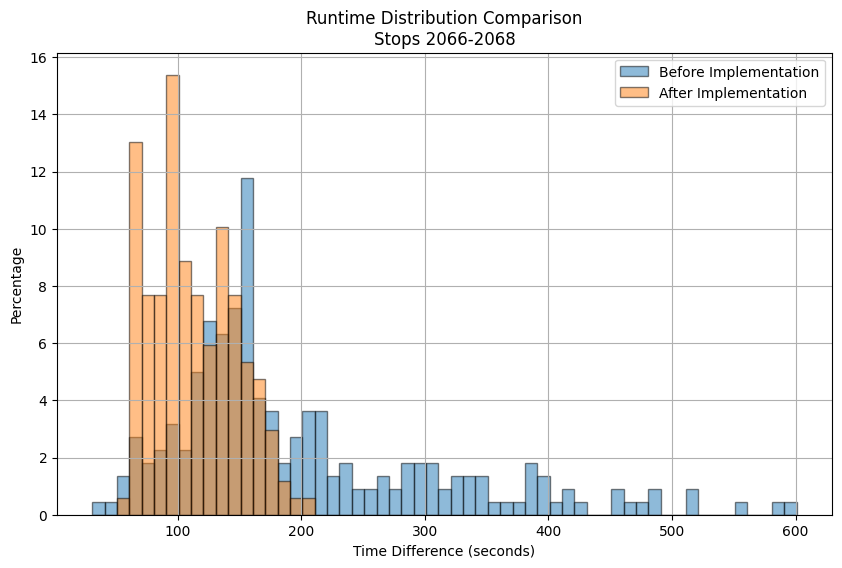

In [36]:
plot_runtime_distribution(
    r71_in_sea2_0_tt, 2062, 2066, 'Before Implementation',
    r71_in_sea2_1_tt, 2062, 2066, 'After Implementation'
)

plot_runtime_distribution(
    r71_in_sea2_0_tt, 2066, 2068, 'Before Implementation',
    r71_in_sea2_1_tt, 2066, 2068, 'After Implementation'
)

plot_runtime_distribution(
    r73_in_sea2_0_tt, 2117, 2066, 'Before Implementation',
    r73_in_sea2_1_tt, 2117, 2066, 'After Implementation'
)

plot_runtime_distribution(
    r73_in_sea2_0_tt, 2066, 2068, 'Before Implementation',
    r73_in_sea2_1_tt, 2066, 2068, 'After Implementation'
)


Similarly, if we visualize the runtim through the whole day together, we can find that the bus travel time distribution are left-screw after bus lane implementation, indicating that the bus priority lane can improve bus speed and reduce travel time variability. 

The reduced travel time variability will indicate the enhancement in reliability.

In [37]:
# filter out the data in r71_in_sea1_0 AM peak (7:30-9:30 am), Midday (Noon-2:00 pm), and PM peak (4:30-6:30 pm) time periods within each day
r71_in_sea2_0_am = r71_in_sea1_0[(r71_in_sea1_0['stoptime_hr'] >= 7.5) & (r71_in_sea1_0['stoptime_hr'] <= 9.5)]
r71_in_sea2_0_mid = r71_in_sea1_0[(r71_in_sea1_0['stoptime_hr'] >= 12) & (r71_in_sea1_0['stoptime_hr'] <= 14)]
r71_in_sea2_0_pm = r71_in_sea1_0[(r71_in_sea1_0['stoptime_hr'] >= 16.5) & (r71_in_sea1_0['stoptime_hr'] <= 18.5)]

r71_in_sea2_1_am = r71_in_sea1_1[(r71_in_sea1_1['stoptime_hr'] >= 7.5) & (r71_in_sea1_1['stoptime_hr'] <= 9.5)]
r71_in_sea2_1_mid = r71_in_sea1_1[(r71_in_sea1_1['stoptime_hr'] >= 12) & (r71_in_sea1_1['stoptime_hr'] <= 14)]
r71_in_sea2_1_pm = r71_in_sea1_1[(r71_in_sea1_1['stoptime_hr'] >= 16.5) & (r71_in_sea1_1['stoptime_hr'] <= 18.5)]

r73_in_sea2_0_am = r73_in_sea1_0[(r73_in_sea1_0['stoptime_hr'] >= 7.5) & (r73_in_sea1_0['stoptime_hr'] <= 9.5)]
r73_in_sea2_0_mid = r73_in_sea1_0[(r73_in_sea1_0['stoptime_hr'] >= 12) & (r73_in_sea1_0['stoptime_hr'] <= 14)]
r73_in_sea2_0_pm = r73_in_sea1_0[(r73_in_sea1_0['stoptime_hr'] >= 16.5) & (r73_in_sea1_0['stoptime_hr'] <= 18.5)]

r73_in_sea2_1_am = r73_in_sea1_1[(r73_in_sea1_1['stoptime_hr'] >= 7.5) & (r73_in_sea1_1['stoptime_hr'] <= 9.5)]
r73_in_sea2_1_mid = r73_in_sea1_1[(r73_in_sea1_1['stoptime_hr'] >= 12) & (r73_in_sea1_1['stoptime_hr'] <= 14)]
r73_in_sea2_1_pm = r73_in_sea1_1[(r73_in_sea1_1['stoptime_hr'] >= 16.5) & (r73_in_sea1_1['stoptime_hr'] <= 18.5)]



In [38]:
r71_in_sea2_0_am_tt = pd.DataFrame()
r71_in_sea2_1_am_tt = pd.DataFrame()
r71_in_sea2_0_mid_tt = pd.DataFrame()
r71_in_sea2_1_mid_tt = pd.DataFrame()
r71_in_sea2_0_pm_tt = pd.DataFrame()
r71_in_sea2_1_pm_tt = pd.DataFrame()
r73_in_sea2_0_am_tt = pd.DataFrame()
r73_in_sea2_1_am_tt = pd.DataFrame()
r73_in_sea2_0_mid_tt = pd.DataFrame()
r73_in_sea2_1_mid_tt = pd.DataFrame()
r73_in_sea2_0_pm_tt = pd.DataFrame()
r73_in_sea2_1_pm_tt = pd.DataFrame()


In [46]:
for stopid_1, stopid_2 in stop_pairs:
    result1 = calculate_travel_time(r71_in_sea2_0_am, stopid_1, stopid_2)
    result2 = calculate_travel_time(r71_in_sea2_1_am, stopid_1, stopid_2)
    result3 = calculate_travel_time(r71_in_sea2_0_mid, stopid_1, stopid_2)
    result4 = calculate_travel_time(r71_in_sea2_1_mid, stopid_1, stopid_2)
    result5 = calculate_travel_time(r71_in_sea2_0_pm, stopid_1, stopid_2)
    result6 = calculate_travel_time(r71_in_sea2_1_pm, stopid_1, stopid_2)
    result7 = calculate_travel_time(r73_in_sea2_0_am, stopid_1, stopid_2)
    result8 = calculate_travel_time(r73_in_sea2_1_am, stopid_1, stopid_2)
    result9 = calculate_travel_time(r73_in_sea2_0_mid, stopid_1, stopid_2)
    result10 = calculate_travel_time(r73_in_sea2_1_mid, stopid_1, stopid_2)
    result11 = calculate_travel_time(r73_in_sea2_0_pm, stopid_1, stopid_2)
    result12 = calculate_travel_time(r73_in_sea2_1_pm, stopid_1, stopid_2)

    r71_in_sea2_0_am_tt = pd.concat([r71_in_sea2_0_am_tt, result1], ignore_index=True)
    r71_in_sea2_1_am_tt = pd.concat([r71_in_sea2_1_am_tt, result2], ignore_index=True)
    r71_in_sea2_0_mid_tt = pd.concat([r71_in_sea2_0_mid_tt, result3], ignore_index=True)
    r71_in_sea2_1_mid_tt = pd.concat([r71_in_sea2_1_mid_tt, result4], ignore_index=True)
    r71_in_sea2_0_pm_tt = pd.concat([r71_in_sea2_0_pm_tt, result5], ignore_index=True)
    r71_in_sea2_1_pm_tt = pd.concat([r71_in_sea2_1_pm_tt, result6], ignore_index=True)
    r73_in_sea2_0_am_tt = pd.concat([r73_in_sea2_0_am_tt, result7], ignore_index=True)
    r73_in_sea2_1_am_tt = pd.concat([r73_in_sea2_1_am_tt, result8], ignore_index=True)
    r73_in_sea2_0_mid_tt = pd.concat([r73_in_sea2_0_mid_tt, result9], ignore_index=True)
    r73_in_sea2_1_mid_tt = pd.concat([r73_in_sea2_1_mid_tt, result10], ignore_index=True)
    r73_in_sea2_0_pm_tt = pd.concat([r73_in_sea2_0_pm_tt, result11], ignore_index=True)
    r73_in_sea2_1_pm_tt = pd.concat([r73_in_sea2_1_pm_tt, result12], ignore_index=True)

    

/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [48]:
print("Median Travel Time for bus 71 at AM peak before implementation", r71_in_sea2_0_am_tt["time_diff"].median())
print("Median Travel Time for bus 71 at AM peak after implementation", r71_in_sea2_1_am_tt["time_diff"].median())
print("Percentage of improvement in the AM peak:", (r71_in_sea2_0_am_tt["time_diff"].median() - r71_in_sea2_1_am_tt["time_diff"].median())/r71_in_sea2_0_am_tt["time_diff"].median())

print("Median Travel Time for bus 71 at Midday before implementation", r71_in_sea2_0_mid_tt["time_diff"].median())
print("Median Travel Time for bus 71 at Midday after implementation", r71_in_sea2_1_mid_tt["time_diff"].median())
print("Percentage of improvement in the Midday:", (r71_in_sea2_0_mid_tt["time_diff"].median() - r71_in_sea2_1_mid_tt["time_diff"].median())/r71_in_sea2_0_mid_tt["time_diff"].median())

print("Median Travel Time for bus 71 at PM peak before implementation", r71_in_sea2_0_pm_tt["time_diff"].median())
print("Median Travel Time for bus 71 at PM peak after implementation", r71_in_sea2_1_pm_tt["time_diff"].median())
print("Percentage of improvement in the PM peak:", (r71_in_sea2_0_pm_tt["time_diff"].median() - r71_in_sea2_1_pm_tt["time_diff"].median())/r71_in_sea2_0_pm_tt["time_diff"].median())

print("Median Travel Time for bus 73 at AM peak before implementation", r73_in_sea2_0_am_tt["time_diff"].median())
print("Median Travel Time for bus 73 at AM peak after implementation", r73_in_sea2_1_am_tt["time_diff"].median())
print("Percentage of improvement in the AM peak:", (r73_in_sea2_0_am_tt["time_diff"].median() - r73_in_sea2_1_am_tt["time_diff"].median())/r73_in_sea2_0_am_tt["time_diff"].median())

print("Median Travel Time for bus 73 at Midday before implementation", r73_in_sea2_0_mid_tt["time_diff"].median())
print("Median Travel Time for bus 73 at Midday after implementation", r73_in_sea2_1_mid_tt["time_diff"].median())
print("Percentage of improvement in the Midday:", (r73_in_sea2_0_mid_tt["time_diff"].median() - r73_in_sea2_1_mid_tt["time_diff"].median())/r73_in_sea2_0_mid_tt["time_diff"].median())

print("Median Travel Time for bus 73 at PM peak before implementation", r73_in_sea2_0_pm_tt["time_diff"].median())
print("Median Travel Time for bus 73 at PM peak after implementation", r73_in_sea2_1_pm_tt["time_diff"].median())
print("Percentage of improvement in the PM peak:", (r73_in_sea2_0_pm_tt["time_diff"].median() - r73_in_sea2_1_pm_tt["time_diff"].median())/r73_in_sea2_0_pm_tt["time_diff"].median())



Median Travel Time for bus 71 at AM peak before implementation 343.0
Median Travel Time for bus 71 at AM peak after implementation 243.0
Percentage of improvement in the AM peak: 0.2915451895043732
Median Travel Time for bus 71 at Midday before implementation 283.0
Median Travel Time for bus 71 at Midday after implementation 148.0
Percentage of improvement in the Midday: 0.47703180212014135
Median Travel Time for bus 71 at PM peak before implementation 303.0
Median Travel Time for bus 71 at PM peak after implementation 138.0
Percentage of improvement in the PM peak: 0.5445544554455446
Median Travel Time for bus 73 at AM peak before implementation 340.5
Median Travel Time for bus 73 at AM peak after implementation 302.5
Percentage of improvement in the AM peak: 0.11160058737151249
Median Travel Time for bus 73 at Midday before implementation 265.0
Median Travel Time for bus 73 at Midday after implementation 158.0
Percentage of improvement in the Midday: 0.4037735849056604
Median Travel 

In season 2, the inbound 71 at AM peak, midday, PM peak, inbound 73 midday, PM peak show great reduction in median travel time. For AM peak of route 73, the effect isn't very significant.

## Out Bound

In [50]:
r71_out_sea1 = r71_out[r71_out['seasonal_period']==1]
r71_out_sea2 = r71_out[r71_out['seasonal_period']==2]
r73_out_sea1 = r73_out[r73_out['seasonal_period']==1]
r73_out_sea2 = r73_out[r73_out['seasonal_period']==2]

r71_out_sea1_0 = r71_out_sea1[r71_out_sea1['implemented']==0]
r71_out_sea1_1 = r71_out_sea1[r71_out_sea1['implemented']==1]
r71_out_sea2_0 = r71_out_sea2[r71_out_sea2['implemented']==0]
r71_out_sea2_1 = r71_out_sea2[r71_out_sea2['implemented']==1]
r73_out_sea1_0 = r73_out_sea1[r73_out_sea1['implemented']==0]
r73_out_sea1_1 = r73_out_sea1[r73_out_sea1['implemented']==1]
r73_out_sea2_0 = r73_out_sea2[r73_out_sea2['implemented']==0]
r73_out_sea2_1 = r73_out_sea2[r73_out_sea2['implemented']==1]


r71_out_sea1_0_tt = pd.DataFrame()
r71_out_sea1_1_tt = pd.DataFrame()
r71_out_sea2_0_tt = pd.DataFrame()
r71_out_sea2_1_tt = pd.DataFrame()
r73_out_sea1_0_tt = pd.DataFrame()
r73_out_sea1_1_tt = pd.DataFrame()
r73_out_sea2_0_tt = pd.DataFrame()
r73_out_sea2_1_tt = pd.DataFrame()

stop_pairs = [(2076, 2026), (2026, 2028), (2028, 2032), (2028, 2118)]

for stopid_1, stopid_2 in stop_pairs:
    result1 = calculate_travel_time(r71_out_sea1_0, stopid_1, stopid_2)
    result2 = calculate_travel_time(r71_out_sea1_1, stopid_1, stopid_2)
    result3 = calculate_travel_time(r71_out_sea2_0, stopid_1, stopid_2)
    result4 = calculate_travel_time(r71_out_sea2_1, stopid_1, stopid_2)
    result5 = calculate_travel_time(r73_out_sea1_0, stopid_1, stopid_2)
    result6 = calculate_travel_time(r73_out_sea1_1, stopid_1, stopid_2)
    result7 = calculate_travel_time(r73_out_sea2_0, stopid_1, stopid_2)
    result8 = calculate_travel_time(r73_out_sea2_1, stopid_1, stopid_2)

    r71_out_sea1_0_tt = pd.concat([r71_out_sea1_0_tt, result1], ignore_index=True)
    r71_out_sea1_1_tt = pd.concat([r71_out_sea1_1_tt, result2], ignore_index=True)
    r71_out_sea2_0_tt = pd.concat([r71_out_sea2_0_tt, result3], ignore_index=True)
    r71_out_sea2_1_tt = pd.concat([r71_out_sea2_1_tt, result4], ignore_index=True)
    r73_out_sea1_0_tt = pd.concat([r73_out_sea1_0_tt, result5], ignore_index=True)
    r73_out_sea1_1_tt = pd.concat([r73_out_sea1_1_tt, result6], ignore_index=True)
    r73_out_sea2_0_tt = pd.concat([r73_out_sea2_0_tt, result7], ignore_index=True)
    r73_out_sea2_1_tt = pd.concat([r73_out_sea2_1_tt, result8], ignore_index=True)

/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [53]:
print("Median Travel Time for bus 71 in Season 1 before implementation", r71_out_sea1_0_tt["time_diff"].median())
print("Median Travel Time for bus 71 in Season 1 after implementation", r71_out_sea1_1_tt["time_diff"].median())
print("Percentage of improvement in Season 1:", (r71_out_sea1_0_tt["time_diff"].median() - r71_out_sea1_1_tt["time_diff"].median())/r71_out_sea1_0_tt["time_diff"].median())

print("Median Travel Time for bus 71 in Season 2 before implementation", r71_out_sea2_0_tt["time_diff"].median())
print("Median Travel Time for bus 71 in Season 2 after implementation", r71_out_sea2_1_tt["time_diff"].median())
print("Percentage of improvement in Season 2:", (r71_out_sea2_0_tt["time_diff"].median() - r71_out_sea2_1_tt["time_diff"].median())/r71_out_sea2_0_tt["time_diff"].median())

print("Median Travel Time for bus 73 in Season 1 before implementation", r73_out_sea1_0_tt["time_diff"].median())
print("Median Travel Time for bus 73 in Season 1 after implementation", r73_out_sea1_1_tt["time_diff"].median())
print("Percentage of improvement in Season 1:", (r73_out_sea1_0_tt["time_diff"].median() - r73_out_sea1_1_tt["time_diff"].median())/r73_out_sea1_0_tt["time_diff"].median())

print("Median Travel Time for bus 73 in Season 2 before implementation", r73_out_sea2_0_tt["time_diff"].median())
print("Median Travel Time for bus 73 in Season 2 after implementation", r73_out_sea2_1_tt["time_diff"].median())
print("Percentage of improvement in Season 2:", (r73_out_sea2_0_tt["time_diff"].median() - r73_out_sea2_1_tt["time_diff"].median())/r73_out_sea2_0_tt["time_diff"].median())




Median Travel Time for bus 71 in Season 1 before implementation 300.0
Median Travel Time for bus 71 in Season 1 after implementation 195.0
Percentage of improvement in Season 1: 0.35
Median Travel Time for bus 71 in Season 2 before implementation 283.0
Median Travel Time for bus 71 in Season 2 after implementation 257.0
Percentage of improvement in Season 2: 0.09187279151943463
Median Travel Time for bus 73 in Season 1 before implementation 299.0
Median Travel Time for bus 73 in Season 1 after implementation 172.0
Percentage of improvement in Season 1: 0.42474916387959866
Median Travel Time for bus 73 in Season 2 before implementation 285.0
Median Travel Time for bus 73 in Season 2 after implementation 253.0
Percentage of improvement in Season 2: 0.11228070175438597


The effect of outbound bus 71 and 73 in season 2 are less significant compared with season 1.

# Broadway corridor

## In Bound

In [55]:
r89_in = pd.read_csv('AVL_2019/Broadway/R89_in.csv')
r89_out = pd.read_csv('AVL_2019/Broadway/R89_out.csv')
r101_in = pd.read_csv('AVL_2019/Broadway/R101_in.csv')
r101_out = pd.read_csv('AVL_2019/Broadway/R101_out.csv')

In [64]:
r89_in_sea1 = r89_in[r89_in['seasonal_period']==1]
r89_in_sea2 = r89_in[r89_in['seasonal_period']==2]
r101_in_sea1 = r101_in[r101_in['seasonal_period']==1]
r101_in_sea2 = r101_in[r101_in['seasonal_period']==2]

r89_in_sea1_0 = r89_in_sea1[r89_in_sea1['implemented']==0]
r89_in_sea1_1 = r89_in_sea1[r89_in_sea1['implemented']==1]
r89_in_sea2_0 = r89_in_sea2[r89_in_sea2['implemented']==0]
r89_in_sea2_1 = r89_in_sea2[r89_in_sea2['implemented']==1]
r101_in_sea1_0 = r101_in_sea1[r101_in_sea1['implemented']==0]
r101_in_sea1_1 = r101_in_sea1[r101_in_sea1['implemented']==1]
r101_in_sea2_0 = r101_in_sea2[r101_in_sea2['implemented']==0]
r101_in_sea2_1 = r101_in_sea2[r101_in_sea2['implemented']==1]


In [75]:
r89_in_sea1[r89_in_sea1['implemented']==1]

,tripdate,year,route,trip,stopid,actstoptime,dir,seasonal_period,implemented


Therefore, we don't have the implemented data in season 1.

In [76]:
r89_in_sea2[r89_in_sea2['implemented']==1]

,tripdate,year,route,trip,stopid,actstoptime,dir,seasonal_period,implemented
52354,2019-10-16,2019,89,66306130,2709,2019-10-16 05:27:51,0,2.0,1
52355,2019-10-16,2019,89,66311599,2703,2019-10-16 05:51:45,0,2.0,1
52356,2019-10-16,2019,89,66311599,2709,2019-10-16 05:56:27,0,2.0,1
52357,2019-10-16,2019,89,66306132,2703,2019-10-16 06:00:22,0,2.0,1
52358,2019-10-16,2019,89,66306132,2709,2019-10-16 06:03:10,0,2.0,1
...,...,...,...,...,...,...,...,...,...
54280,2019-11-21,2019,89,66752626,2709,2019-11-21 18:32:02,0,2.0,1
54281,2019-11-21,2019,89,66752617,2703,2019-11-21 19:21:43,0,2.0,1
54282,2019-11-21,2019,89,66751914,2703,2019-11-21 19:22:34,0,2.0,1
54283,2019-11-21,2019,89,66752617,2709,2019-11-21 19:27:02,0,2.0,1


In [87]:
r89_in_sea1_0_tt = pd.DataFrame()
r89_in_sea1_1_tt = pd.DataFrame()
r89_in_sea2_0_tt = pd.DataFrame()
r89_in_sea2_1_tt = pd.DataFrame()
r101_in_sea1_0_tt = pd.DataFrame()
r101_in_sea1_1_tt = pd.DataFrame()
r101_in_sea2_0_tt = pd.DataFrame()
r101_in_sea2_1_tt = pd.DataFrame()

stop_pairs = [(2703, 2709), (5303, 2709)]

for stopid_1, stopid_2 in stop_pairs:
    result1 = calculate_travel_time(r89_in_sea1_0, stopid_1, stopid_2)
    result2 = calculate_travel_time(r89_in_sea1_1, stopid_1, stopid_2)
    result3 = calculate_travel_time(r89_in_sea2_0, stopid_1, stopid_2)
    result4 = calculate_travel_time(r89_in_sea2_1, stopid_1, stopid_2)
    result5 = calculate_travel_time(r101_in_sea1_0, stopid_1, stopid_2)
    result6 = calculate_travel_time(r101_in_sea1_1, stopid_1, stopid_2)
    result7 = calculate_travel_time(r101_in_sea2_0, stopid_1, stopid_2)
    result8 = calculate_travel_time(r101_in_sea2_1, stopid_1, stopid_2)

    r89_in_sea1_0_tt = pd.concat([r89_in_sea1_0_tt, result1], ignore_index=True)
    r89_in_sea1_1_tt = pd.concat([r89_in_sea1_1_tt, result2], ignore_index=True)
    r89_in_sea2_0_tt = pd.concat([r89_in_sea2_0_tt, result3], ignore_index=True)
    r89_in_sea2_1_tt = pd.concat([r89_in_sea2_1_tt, result4], ignore_index=True)
    r101_in_sea1_0_tt = pd.concat([r101_in_sea1_0_tt, result5], ignore_index=True)
    r101_in_sea1_1_tt = pd.concat([r101_in_sea1_1_tt, result6], ignore_index=True)
    r101_in_sea2_0_tt = pd.concat([r101_in_sea2_0_tt, result7], ignore_index=True)
    r101_in_sea2_1_tt = pd.concat([r101_in_sea2_1_tt, result8], ignore_index=True)

/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actstoptime'] = pd.to_datetime(data['actstoptime'])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_20281/1811337970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [80]:
r89_in_sea2_1

,tripdate,year,route,trip,stopid,actstoptime,dir,seasonal_period,implemented
52354,2019-10-16,2019,89,66306130,2709,2019-10-16 05:27:51,0,2.0,1
52355,2019-10-16,2019,89,66311599,2703,2019-10-16 05:51:45,0,2.0,1
52356,2019-10-16,2019,89,66311599,2709,2019-10-16 05:56:27,0,2.0,1
52357,2019-10-16,2019,89,66306132,2703,2019-10-16 06:00:22,0,2.0,1
52358,2019-10-16,2019,89,66306132,2709,2019-10-16 06:03:10,0,2.0,1
...,...,...,...,...,...,...,...,...,...
54280,2019-11-21,2019,89,66752626,2709,2019-11-21 18:32:02,0,2.0,1
54281,2019-11-21,2019,89,66752617,2703,2019-11-21 19:21:43,0,2.0,1
54282,2019-11-21,2019,89,66751914,2703,2019-11-21 19:22:34,0,2.0,1
54283,2019-11-21,2019,89,66752617,2709,2019-11-21 19:27:02,0,2.0,1


In [88]:
print("Median Travel Time for bus 89 in Season 2 before implementation", r89_in_sea2_0_tt["time_diff"].median())
print("Median Travel Time for bus 89 in Season 2 after implementation", r89_in_sea2_1_tt["time_diff"].median())
print("Percentage of improvement in Season 2:", (r89_in_sea2_0_tt["time_diff"].median() - r89_in_sea2_1_tt["time_diff"].median())/r89_in_sea2_0_tt["time_diff"].median())

print("Median Travel Time for bus 101 in Season 2 before implementation", r101_in_sea2_0_tt["time_diff"].median())
print("Median Travel Time for bus 101 in Season 2 after implementation", r101_in_sea2_1_tt["time_diff"].median())
print("Percentage of improvement in Season 2:", (r101_in_sea2_0_tt["time_diff"].median() - r101_in_sea2_1_tt["time_diff"].median())/r101_in_sea2_0_tt["time_diff"].median())

Median Travel Time for bus 89 in Season 2 before implementation 354.0
Median Travel Time for bus 89 in Season 2 after implementation 294.0
Percentage of improvement in Season 2: 0.1694915254237288
Median Travel Time for bus 101 in Season 2 before implementation 378.0
Median Travel Time for bus 101 in Season 2 after implementation 336.0
Percentage of improvement in Season 2: 0.1111111111111111


# The effect of bus priority lanes on cycle time 

Let's take season 1 AM peak as an example. 

In the inbound direction, the Median Travel Time for bus 71 at AM peak before implementation 343.0 seconds, and the Median Travel Time for bus 71 at AM peak after implementation 243.0 seconds. The median time saving for inbound direction is 100 seconds. Similarly, we get the median time saving for outbound direction is 105 seconds. Let the running times before implementing be $t_1$ and $t_2$. Let the running times after implementing be $t_1'$ and $t_2'$. $(t_1'+t_2') - (t_1+t_2) = 205 $ seconds.

We can use the following ways to adjust the cycle time after implementing:
- Put the 205 seconds to the recovery time $r_1$ and $r_2$ to give the drivers more time to rest.
- Get rid of the 205 seconds in cycle time c. Therefore, the cycle time c is reduced to $63-205/60 \times 95\% = 59.76$ minutes
- Enhance the percentile to have more reliability. The percentile can be enhanced to around 97%.
- Combine the above strategies.

We can do similar analysis on bus 73.